In [221]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [222]:
 df=pd.read_csv("automobile train set.csv")

In [223]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [224]:
# id is not required 
df.drop("ID",axis=1,inplace=True)

In [225]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Var_1            7992 non-null   object 
 9   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 630.4+ KB


# Exploratory Data Analytics

In [117]:
# EDA 
df.describe()

,Age,Work_Experience,Family_Size
count,8068.000000,7239.000000,7733.000000
mean,43.466906,2.641663,2.850123
std,16.711696,3.406763,1.531413
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


# Handling missing values

<AxesSubplot:>

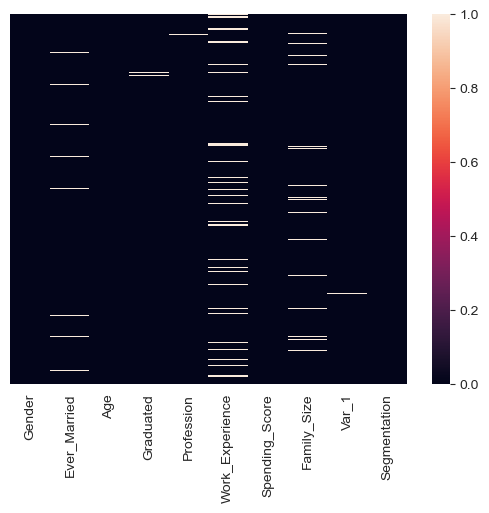

In [118]:
sns.heatmap(df.isnull(),yticklabels=False)

In [119]:
# missing values 
df.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [12]:
# try to find out missing value type in ever married (missing completely at random ,missing at random or missing not at random)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

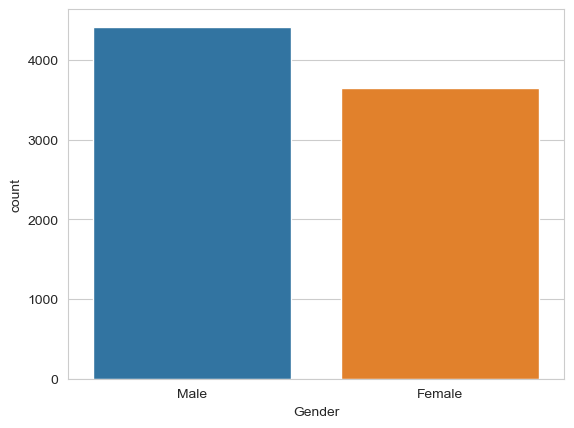

In [120]:
# Gender 
sns.set_style("whitegrid")
sns.countplot(df["Gender"])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Segmentation', ylabel='count'>

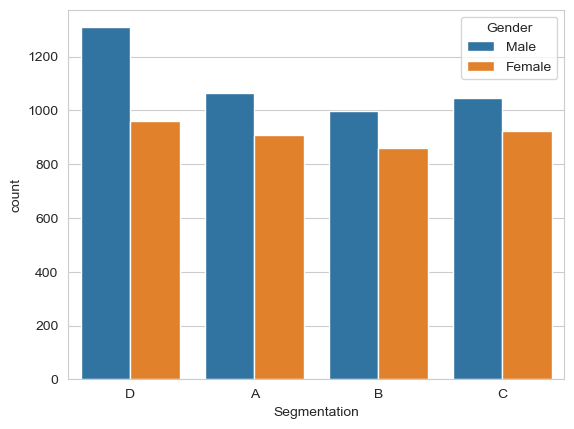

In [121]:

sns.countplot(df["Segmentation"],hue=df["Gender"])
# the class D is the most popular class and specisially male  buy class D and in total male  buy more cars compared to femails

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

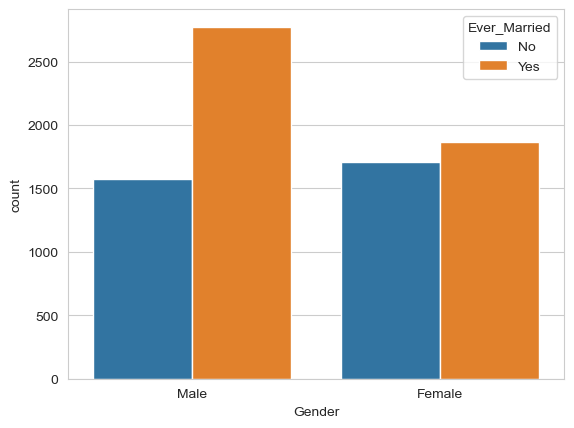

In [122]:
# Gender and Ever_Married relation 
sns.countplot(df["Gender"],hue=df["Ever_Married"])
# married female are approximately twice as much as female single people 
# for male the married and unmarried is almost the same numnber 
# is seems that there is no relationship between Gender and having missing Ever_Married

<AxesSubplot:xlabel='Segmentation', ylabel='count'>

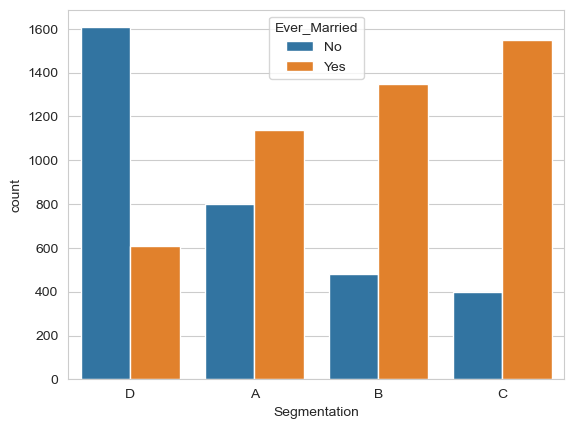

In [123]:
sns.countplot(x=df["Segmentation"],hue=df["Ever_Married"])
# class A,B, AND c mostly married people buy but class C is populare among signle people
# we can replace null value in ever married based on the car class

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ever_Married', ylabel='Work_Experience'>

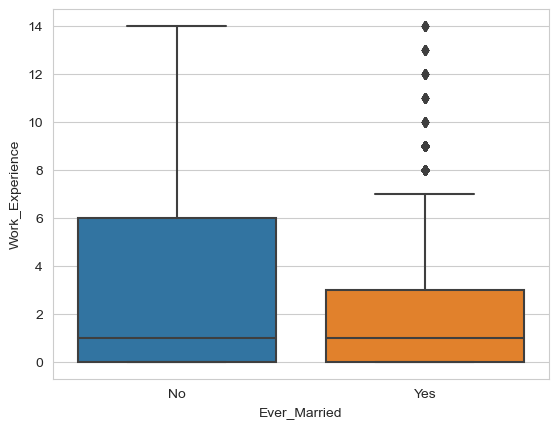

In [124]:
sns.boxplot(df["Ever_Married"].dropna(),df["Work_Experience"])

In [227]:
# handling Ever_Married missing values (it is based on the car class, if we have class ABC replace with married and for class D replace with single)

def ever_married_mutation(cols):
    Ever_Married=cols[0]
    Segmentation=cols[1]
    
    
    if pd.isnull(Ever_Married):
        if Segmentation=="A":
            return "Yes"
        elif Segmentation=="B":
            return "Yes"
        elif Segmentation=="C":
            return "Yes"
        else:
            return "No"
    else:
        return Ever_Married
            


In [228]:
df["Ever_Married"]=df[["Ever_Married","Segmentation"]].apply(ever_married_mutation,axis=1)

In [229]:
df["Ever_Married"].isnull().sum()

0

<AxesSubplot:xlabel='Age', ylabel='Count'>

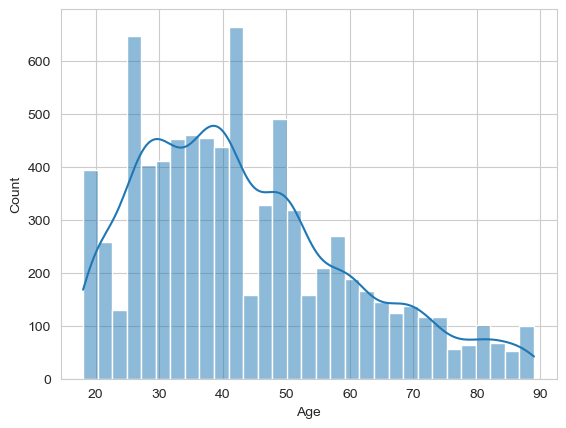

In [230]:
sns.histplot(df["Age"],kde=True)
# the age histogram is almost normal distribution, it is a bit right skewed

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Graduated', ylabel='count'>

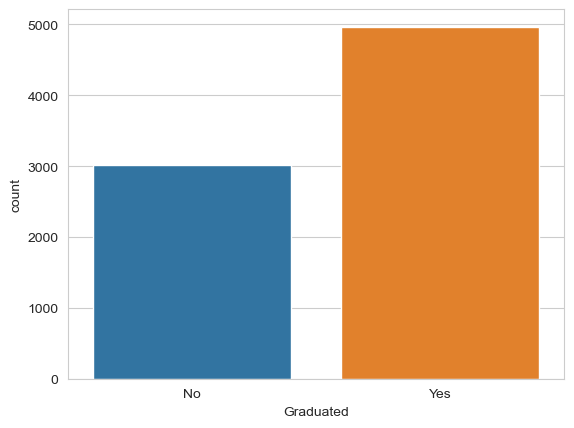

In [231]:
sns.countplot(df["Graduated"])
# the number of graduated people is about 2000 more than non graduated

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Graduated', ylabel='Age'>

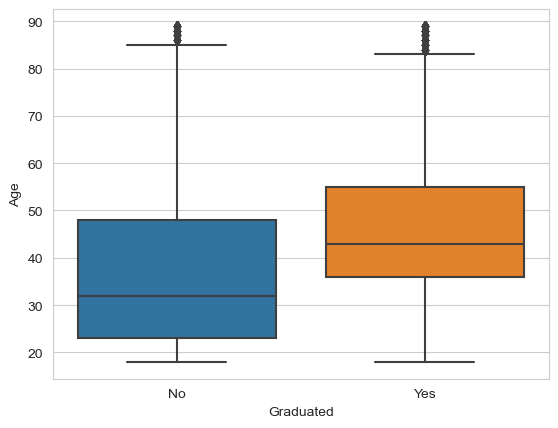

In [232]:
# graduation and age realtionship 
sns.boxplot(df["Graduated"],df["Age"])
# it is natuaral that graduated people are older than not graduated ones 
# there is no specific relationship between numm values and age

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Graduated', ylabel='count'>

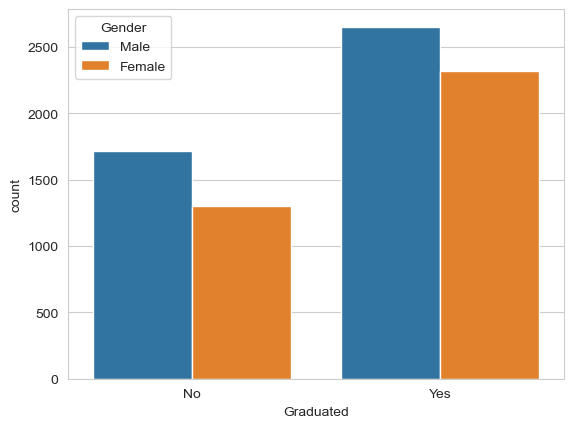

In [233]:
sns.countplot(df["Graduated"],hue=df["Gender"])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Graduated', ylabel='count'>

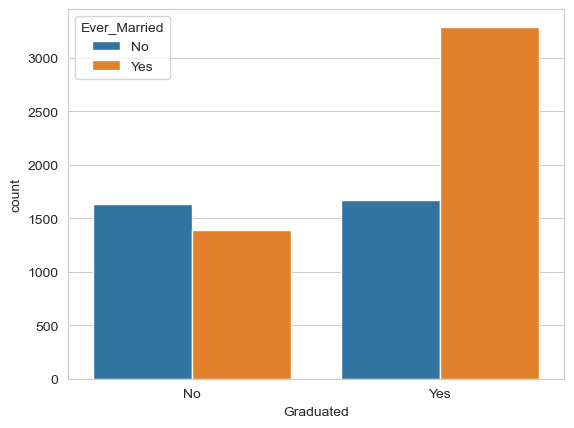

In [234]:
sns.countplot(df["Graduated"],hue=df["Ever_Married"])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Graduated', ylabel='count'>

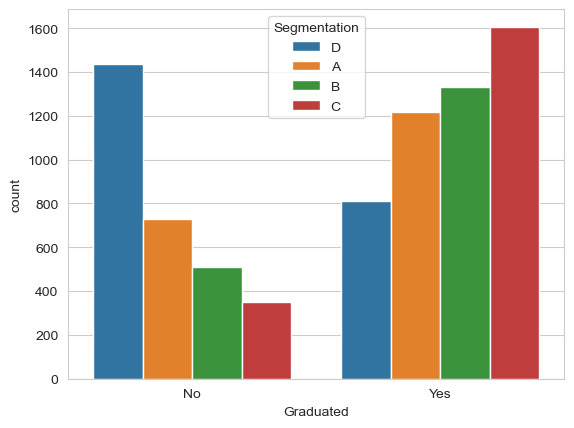

In [235]:
sns.countplot(df["Graduated"],hue=df["Segmentation"])
# we can replace the null values by consideringg the car segment purchase, if the car segment is ABC the person is graduated 
# and if the car segment is D the person is not graduated


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Graduated', ylabel='count'>

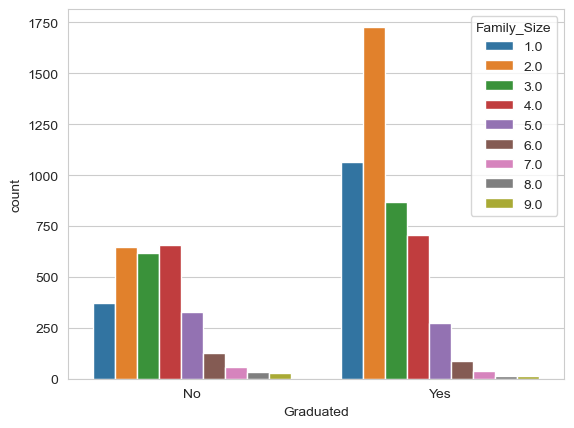

In [236]:
sns.countplot(df["Graduated"],hue=df["Family_Size"])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Graduated', ylabel='count'>

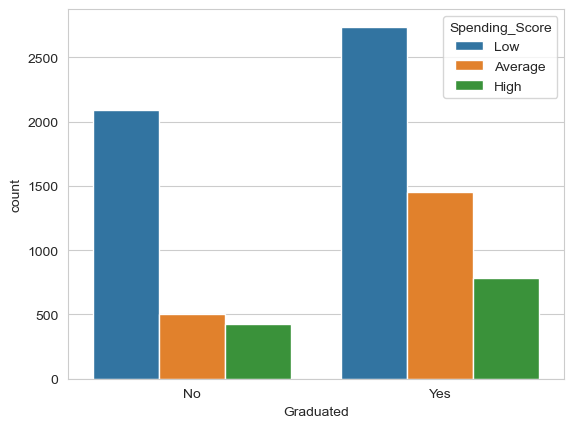

In [135]:
sns.countplot(df["Graduated"],hue=df["Spending_Score"])

In [237]:
df["Graduated"].fillna(df["Graduated"].mode()[0],inplace=True)

In [238]:
df["Graduated"].isnull().sum()

0

In [239]:
df.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

<AxesSubplot:>

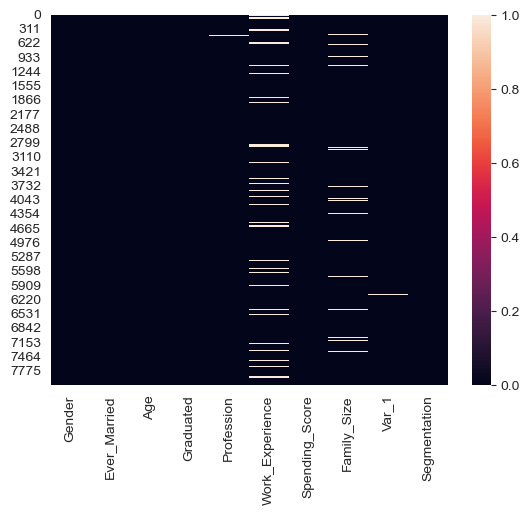

In [240]:
sns.heatmap(df.isnull())

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Segmentation', ylabel='Work_Experience'>

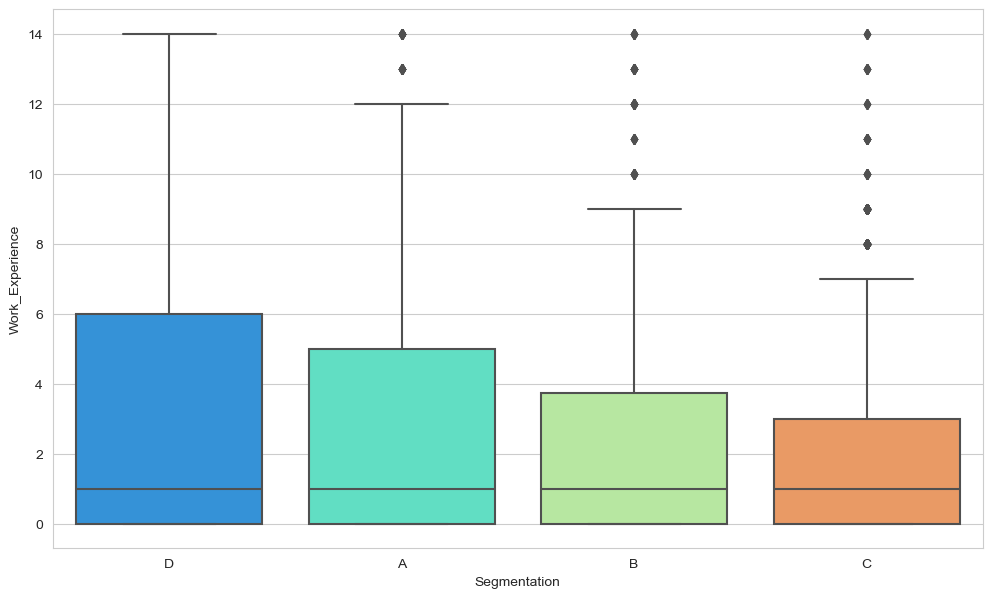

In [34]:
plt.figure(figsize=(12,7))
sns.boxplot(df["Segmentation"],df["Work_Experience"],data=df,palette="rainbow")



C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Work_Experience', ylabel='Age'>

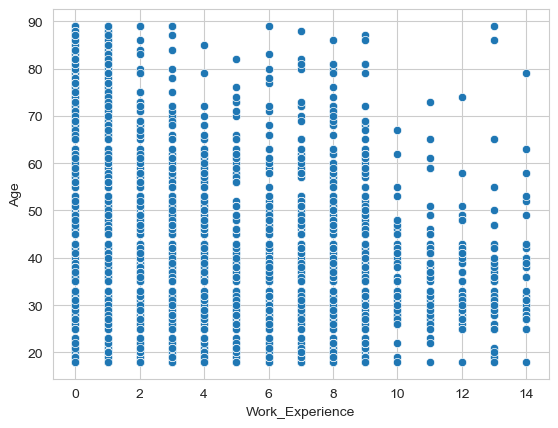

In [35]:
sns.scatterplot(df["Work_Experience"],df["Age"])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Work_Experience', ylabel='Spending_Score'>

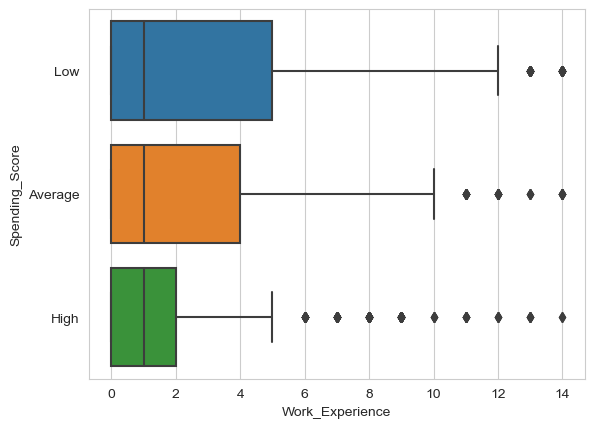

In [36]:
sns.boxplot(df["Work_Experience"],df["Spending_Score"])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Work_Experience', ylabel='Spending_Score'>

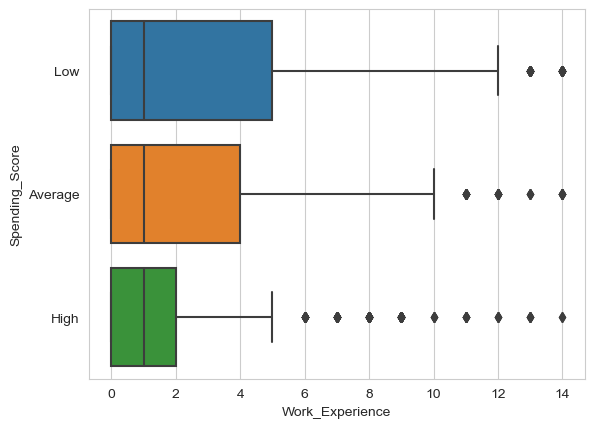

In [37]:
sns.boxplot(df["Work_Experience"],df["Spending_Score"])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Work_Experience', ylabel='count'>

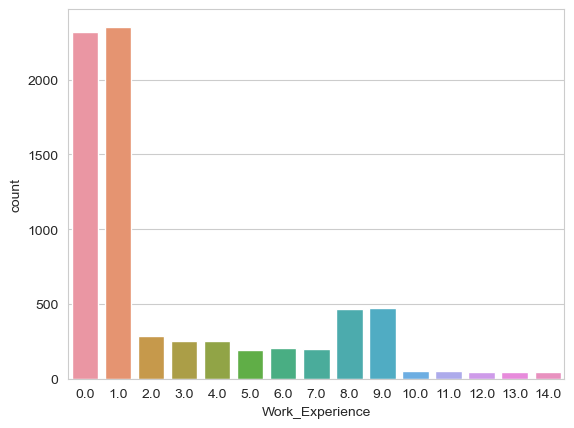

In [38]:
sns.countplot(df["Work_Experience"])

In [241]:
df["Work_Experience_Nan_Importance"]=np.where(df["Work_Experience"].isnull(),1,0)

In [242]:
# work experience missing value handling 
# random sampling creating and creating one extra feature to get the importance of missing values

random_sample=df["Work_Experience"].dropna().sample(829,random_state=5)

In [243]:
random_sample.shape

(829,)

In [244]:
random_sample.index=df[df["Work_Experience"].isnull()].index

In [245]:
print(random_sample.index)

Int64Index([   1,    4,   13,   39,   45,   47,   69,   95,  110,  133,
            ...
            7978, 7987, 7997, 8008, 8009, 8020, 8029, 8040, 8047, 8049],
           dtype='int64', length=829)


In [246]:
df[df["Work_Experience"].isnull()].index

Int64Index([   1,    4,   13,   39,   45,   47,   69,   95,  110,  133,
            ...
            7978, 7987, 7997, 8008, 8009, 8020, 8029, 8040, 8047, 8049],
           dtype='int64', length=829)

In [247]:
df.loc[df["Work_Experience"].isnull(),"Work_Experience"]=random_sample


# df.loc[df["LotFrontage"].isnull(),"LotFrontage"]=random_sample

<AxesSubplot:>

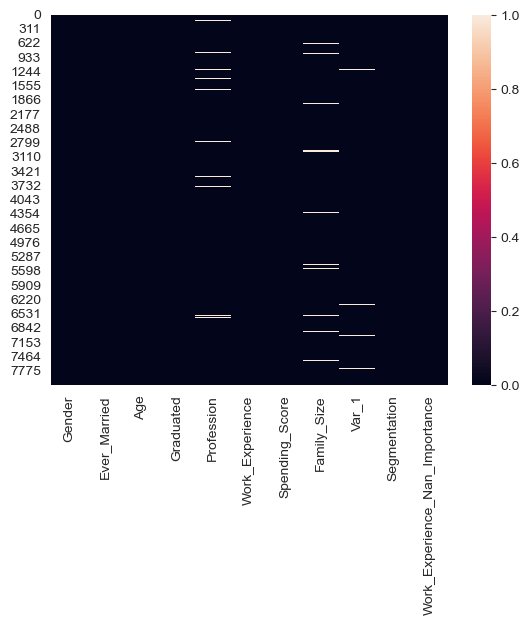

In [248]:
sns.heatmap(df.isnull())

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profession', ylabel='count'>

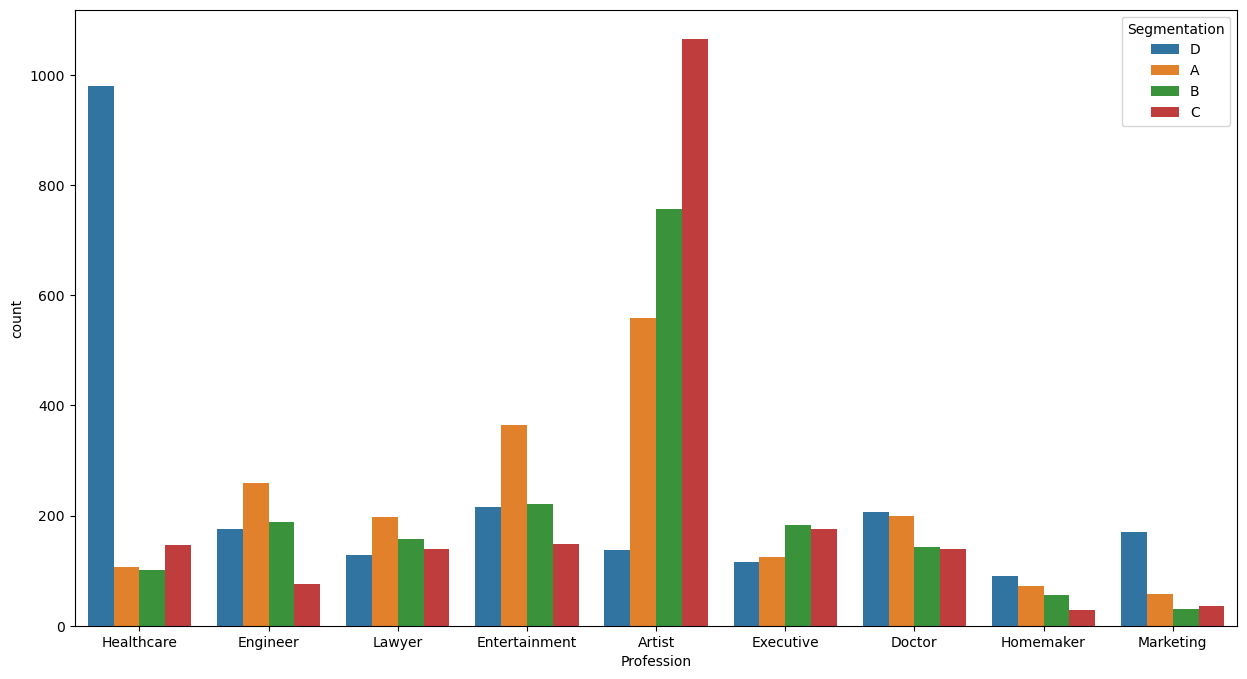

In [26]:
plt.figure(figsize=(15,8))
sns.countplot(df["Profession"],hue=df["Segmentation"])

In [249]:
# considering for ABC segment Artist Profession and for D Healthcare
def profession_imputation(cols):
    Profession=cols[0]
    Segmentation=cols[1]
    
    if pd.isnull(Profession):
        if Segmentation == "A":
            return "Artist Profession"
        
        elif Segmentation == "B":
            return "Artist Profession"
        
        elif Segmentation == "C":
            return "Artist Profession"
        
        else:
            return "HealthCare"
        
    else:
        return Profession
        


      

In [250]:
df["Profession"]=df[["Profession","Segmentation"]].apply(profession_imputation,axis=1)

In [251]:
df["Profession"].isnull().sum()

0

In [252]:
df["Profession"].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', 'HealthCare',
       'Artist Profession'], dtype=object)

In [253]:
df["Family_Size"].isnull().sum()

335

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Family_Size', ylabel='count'>

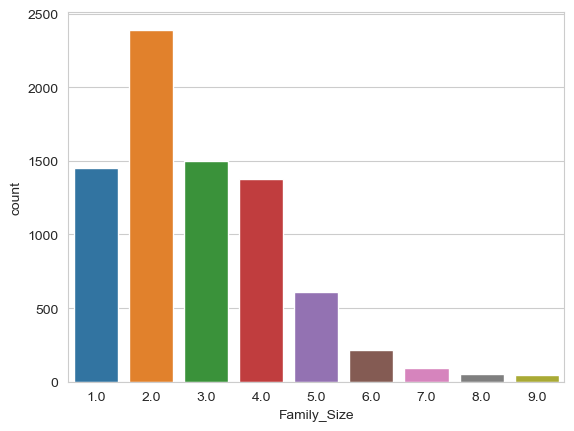

In [153]:
sns.countplot(df["Family_Size"])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Family_Size', ylabel='count'>

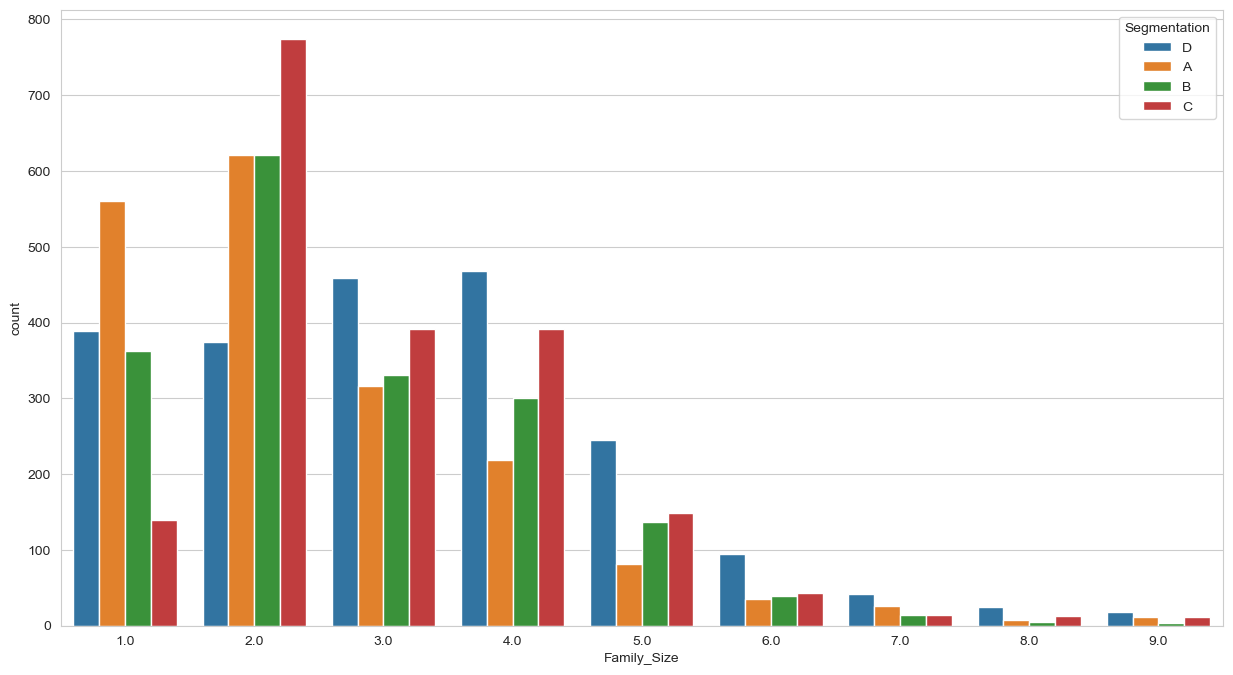

In [154]:
plt.figure(figsize=(15,8))
sns.countplot(df["Family_Size"],hue=df["Segmentation"])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Family_Size', ylabel='count'>

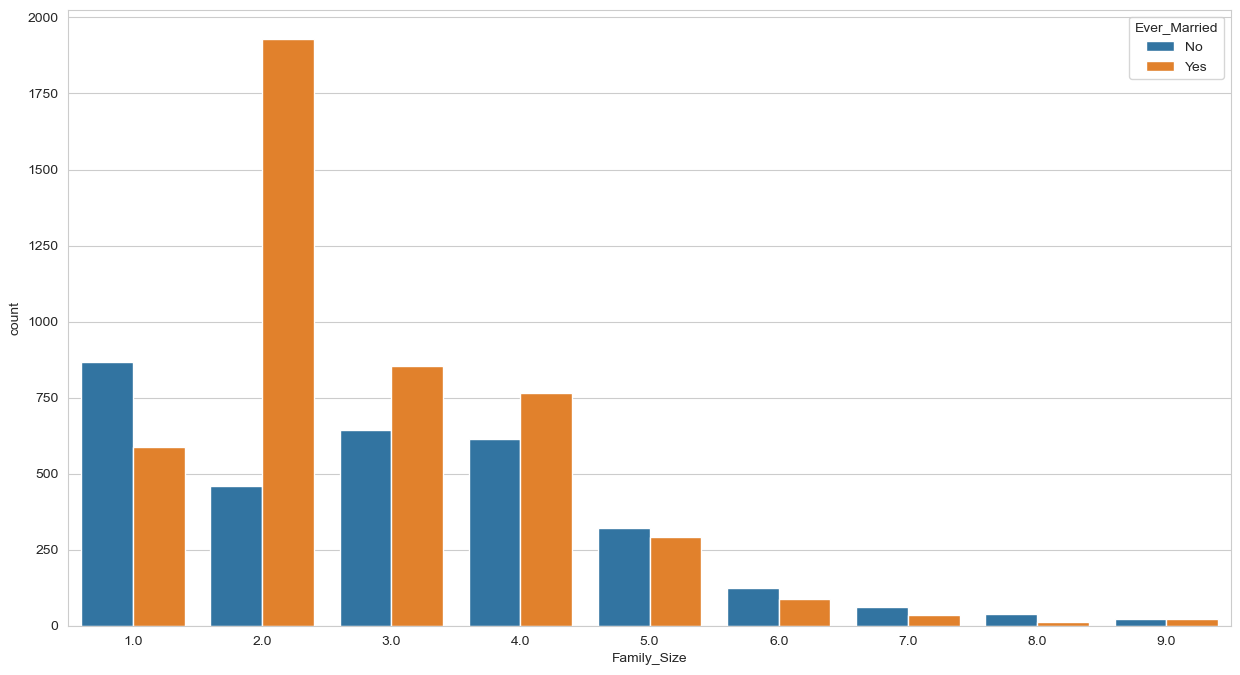

In [155]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
sns.countplot(df["Family_Size"],hue=df["Ever_Married"])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Family_Size', ylabel='count'>

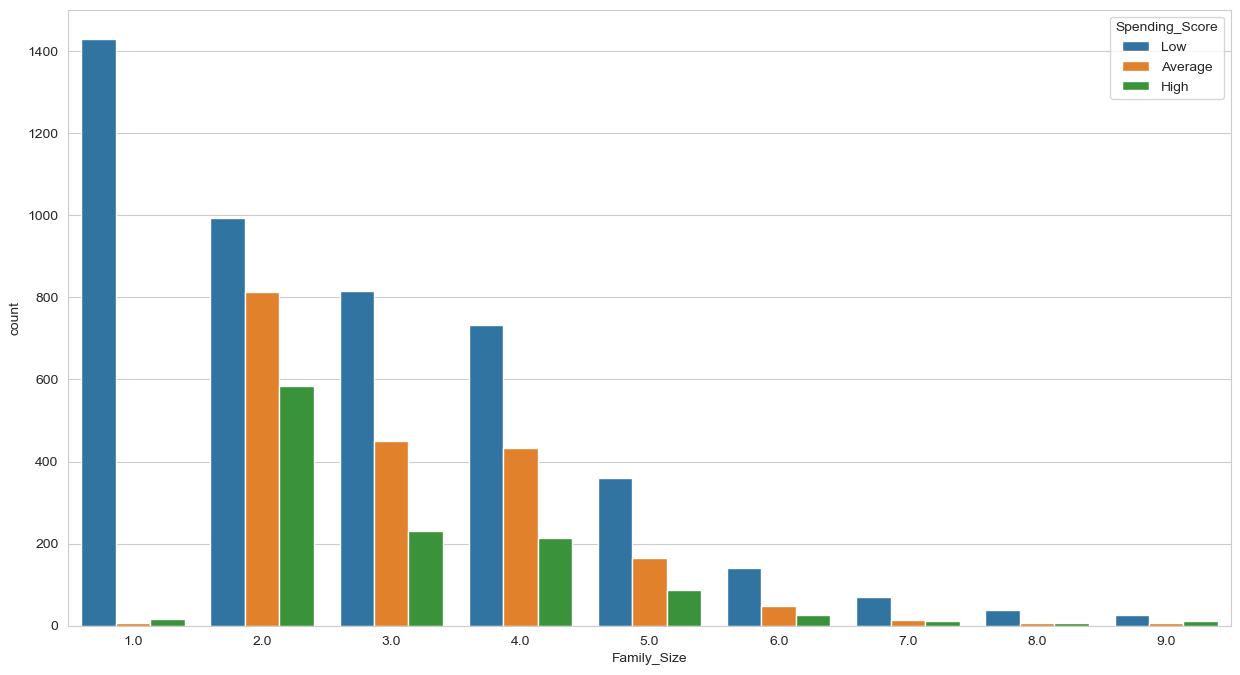

In [33]:
plt.figure(figsize=(15,8))
sns.countplot(df["Family_Size"],hue=df["Spending_Score"])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Family_Size', ylabel='count'>

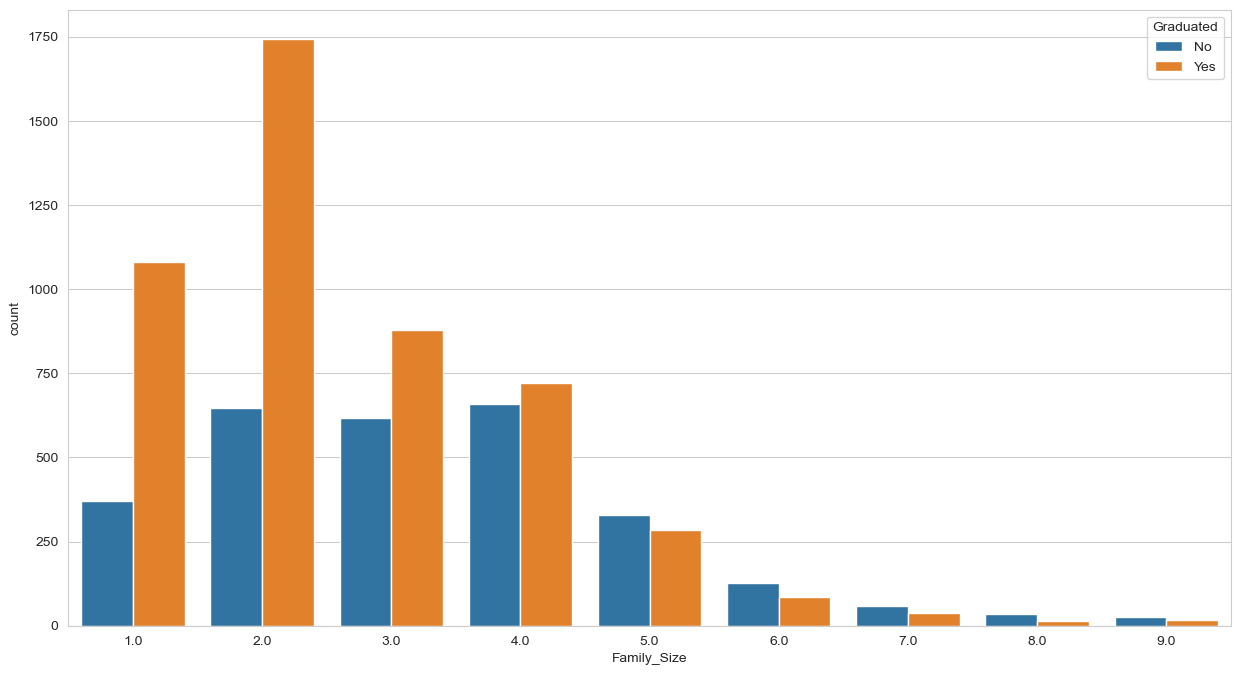

In [35]:
plt.figure(figsize=(15,8))
sns.countplot(df["Family_Size"],hue=df["Graduated"])

In [254]:
def Family_Size_imputation(cols):
    Family_Size=cols[0]
    Ever_Married=cols[1]
    
    if pd.isnull(Family_Size):
        if Ever_Married == "Yes":
            return 2
        
        else:
            return 3
        
    else:
        return Family_Size
        

In [255]:
df["Family_Size"]=df[["Family_Size","Ever_Married"]].apply(Family_Size_imputation,axis=1)

In [256]:
df["Family_Size"].isnull().sum()

0

In [257]:
df["Family_Size"].unique()

array([4., 3., 1., 2., 6., 5., 8., 7., 9.])

In [258]:
df["Var_1"].isnull().sum()

76

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Var_1', ylabel='count'>

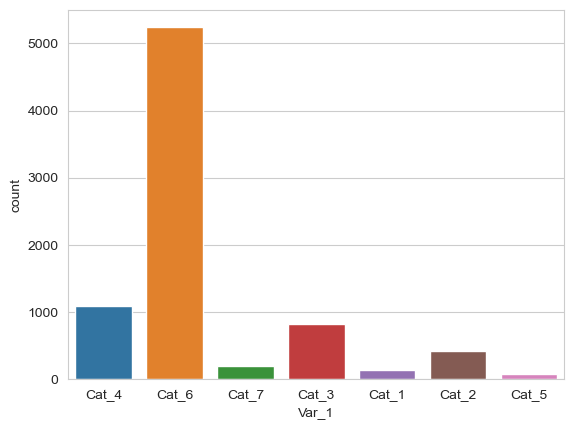

In [259]:
sns.countplot(df["Var_1"])

In [260]:
df["Var_1"].fillna(df["Var_1"].mode()[0],inplace=True)

In [261]:
df["Var_1"].isnull().sum()

0

In [262]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Work_Experience_Nan_Importance
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,0
1,Female,Yes,38,Yes,Engineer,0.0,Average,3.0,Cat_4,A,1
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,0
4,Female,Yes,40,Yes,Entertainment,9.0,High,6.0,Cat_6,A,1


In [263]:
df["Var_1"].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 'Cat_5'],
      dtype=object)

In [264]:
df.isnull().sum()

Gender                            0
Ever_Married                      0
Age                               0
Graduated                         0
Profession                        0
Work_Experience                   0
Spending_Score                    0
Family_Size                       0
Var_1                             0
Segmentation                      0
Work_Experience_Nan_Importance    0
dtype: int64

# handling categorical variables

In [265]:
# handling categorical variables 

cat_var=[features for features in df if df[features].dtypes =="O"]

In [266]:
cat_var

['Gender',
 'Ever_Married',
 'Graduated',
 'Profession',
 'Spending_Score',
 'Var_1',
 'Segmentation']

In [267]:
for i in cat_var:
    print(i, "     ",df[i].value_counts())

Gender       Male      4417
Female    3651
Name: Gender, dtype: int64
Ever_Married       Yes    4731
No     3337
Name: Ever_Married, dtype: int64
Graduated       Yes    5046
No     3022
Name: Graduated, dtype: int64
Profession       Artist               2516
Healthcare           1332
Entertainment         949
Engineer              699
Doctor                688
Lawyer                623
Executive             599
Marketing             292
Homemaker             246
Artist Profession      73
HealthCare             51
Name: Profession, dtype: int64
Spending_Score       Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64
Var_1       Cat_6    5314
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64
Segmentation       D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64


In [268]:
df["Gender"]=pd.get_dummies(df["Gender"],drop_first=True)
df["Ever_Married"]=pd.get_dummies(df["Ever_Married"],drop_first=True)
df["Graduated"]=pd.get_dummies(df["Graduated"],drop_first=True)


In [269]:
df["Gender"]

0       1
1       0
2       0
3       1
4       0
       ..
8063    1
8064    1
8065    0
8066    0
8067    1
Name: Gender, Length: 8068, dtype: uint8

In [270]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Work_Experience_Nan_Importance
0,1,0,22,0,Healthcare,1.0,Low,4.0,Cat_4,D,0
1,0,1,38,1,Engineer,0.0,Average,3.0,Cat_4,A,1
2,0,1,67,1,Engineer,1.0,Low,1.0,Cat_6,B,0
3,1,1,67,1,Lawyer,0.0,High,2.0,Cat_6,B,0
4,0,1,40,1,Entertainment,9.0,High,6.0,Cat_6,A,1


In [271]:
df["Profession"].value_counts()

Artist               2516
Healthcare           1332
Entertainment         949
Engineer              699
Doctor                688
Lawyer                623
Executive             599
Marketing             292
Homemaker             246
Artist Profession      73
HealthCare             51
Name: Profession, dtype: int64

In [36]:
# one_hot with many categories 

In [272]:
def cat_handling(variable, frequentt_variables):
    for i in frequentt_variables:
        df[i]=np.where(df[variable]==i,1,0) 

In [273]:
frequentt_variables=df["Profession"].value_counts().sort_values(ascending=False).head(10).index
cat_handling("Profession",frequentt_variables)

In [274]:
df.head(10)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Work_Experience_Nan_Importance,Artist,Healthcare,Entertainment,Engineer,Doctor,Lawyer,Executive,Marketing,Homemaker,Artist Profession
0,1,0,22,0,Healthcare,1.0,Low,4.0,Cat_4,D,0,0,1,0,0,0,0,0,0,0,0
1,0,1,38,1,Engineer,0.0,Average,3.0,Cat_4,A,1,0,0,0,1,0,0,0,0,0,0
2,0,1,67,1,Engineer,1.0,Low,1.0,Cat_6,B,0,0,0,0,1,0,0,0,0,0,0
3,1,1,67,1,Lawyer,0.0,High,2.0,Cat_6,B,0,0,0,0,0,0,1,0,0,0,0
4,0,1,40,1,Entertainment,9.0,High,6.0,Cat_6,A,1,0,0,1,0,0,0,0,0,0,0
5,1,1,56,0,Artist,0.0,Average,2.0,Cat_6,C,0,1,0,0,0,0,0,0,0,0,0
6,1,0,32,1,Healthcare,1.0,Low,3.0,Cat_6,C,0,0,1,0,0,0,0,0,0,0,0
7,0,0,33,1,Healthcare,1.0,Low,3.0,Cat_6,D,0,0,1,0,0,0,0,0,0,0,0
8,0,1,61,1,Engineer,0.0,Low,3.0,Cat_7,D,0,0,0,0,1,0,0,0,0,0,0
9,0,1,55,1,Artist,1.0,Average,4.0,Cat_6,C,0,1,0,0,0,0,0,0,0,0,0


In [275]:
df.drop("Profession",axis=1)

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Work_Experience_Nan_Importance,Artist,Healthcare,Entertainment,Engineer,Doctor,Lawyer,Executive,Marketing,Homemaker,Artist Profession
0,1,0,22,0,1.0,Low,4.0,Cat_4,D,0,0,1,0,0,0,0,0,0,0,0
1,0,1,38,1,0.0,Average,3.0,Cat_4,A,1,0,0,0,1,0,0,0,0,0,0
2,0,1,67,1,1.0,Low,1.0,Cat_6,B,0,0,0,0,1,0,0,0,0,0,0
3,1,1,67,1,0.0,High,2.0,Cat_6,B,0,0,0,0,0,0,1,0,0,0,0
4,0,1,40,1,9.0,High,6.0,Cat_6,A,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,1,0,22,0,0.0,Low,7.0,Cat_1,D,0,0,0,0,0,0,0,0,0,0,0
8064,1,0,35,0,3.0,Low,4.0,Cat_4,D,0,0,0,0,0,0,0,1,0,0,0
8065,0,0,33,1,1.0,Low,1.0,Cat_6,D,0,0,1,0,0,0,0,0,0,0,0
8066,0,0,27,1,1.0,Low,4.0,Cat_6,B,0,0,1,0,0,0,0,0,0,0,0


In [276]:
df["Spending_Score"].unique()

array(['Low', 'Average', 'High'], dtype=object)

In [277]:
# Spending score
spending_dict={"Low":0, "Average":1, "High":2}

In [278]:
df["Spending_Score"]=df["Spending_Score"].map(spending_dict)

In [279]:
df["Spending_Score"].head()

0    0
1    1
2    0
3    2
4    2
Name: Spending_Score, dtype: int64

In [280]:
df=df.copy()

In [281]:

df1=pd.get_dummies(df["Var_1"])

In [282]:
df1

,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
8063,1,0,0,0,0,0,0
8064,0,0,0,1,0,0,0
8065,0,0,0,0,0,1,0
8066,0,0,0,0,0,1,0


In [283]:

df=pd.concat([df1,df],axis=1)

In [284]:
df.columns

Index(['Cat_1', 'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5', 'Cat_6', 'Cat_7', 'Gender',
       'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_Experience',
       'Spending_Score', 'Family_Size', 'Var_1', 'Segmentation',
       'Work_Experience_Nan_Importance', 'Artist', 'Healthcare',
       'Entertainment', 'Engineer', 'Doctor', 'Lawyer', 'Executive',
       'Marketing', 'Homemaker', 'Artist Profession'],
      dtype='object')

In [285]:

df.drop(["Profession","Var_1"],axis=1,inplace=True)

In [286]:
pd.set_option('display.max_columns', None)
df.head()

,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Work_Experience_Nan_Importance,Artist,Healthcare,Entertainment,Engineer,Doctor,Lawyer,Executive,Marketing,Homemaker,Artist Profession
0,0,0,0,1,0,0,0,1,0,22,0,1.0,0,4.0,D,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,38,1,0.0,1,3.0,A,1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,1,67,1,1.0,0,1.0,B,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1,1,67,1,0.0,2,2.0,B,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,40,1,9.0,2,6.0,A,1,0,0,1,0,0,0,0,0,0,0


In [287]:
seg_dict={"A":1,"B":2,"C":3,"D":4}

In [288]:
df["Segmentation"]=df["Segmentation"].map(seg_dict)

In [289]:
df.head()

,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Work_Experience_Nan_Importance,Artist,Healthcare,Entertainment,Engineer,Doctor,Lawyer,Executive,Marketing,Homemaker,Artist Profession
0,0,0,0,1,0,0,0,1,0,22,0,1.0,0,4.0,4,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,38,1,0.0,1,3.0,1,1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,1,67,1,1.0,0,1.0,2,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1,1,67,1,0.0,2,2.0,2,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,40,1,9.0,2,6.0,1,1,0,0,1,0,0,0,0,0,0,0


### in this problem the outlier are not removed because it is a customer segmentation problem and abnormal patterns might identify imprtant unusuall customer behavior manners

# Rescaling data using standard scaling

## separating train and test to avoid data leakage

In [290]:
from sklearn.model_selection import train_test_split

In [291]:
y=df["Segmentation"]

In [292]:
df.drop("Segmentation",axis=1,inplace=True)

In [293]:
X=df.iloc[:,:]

In [294]:
X.head()  

,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Work_Experience_Nan_Importance,Artist,Healthcare,Entertainment,Engineer,Doctor,Lawyer,Executive,Marketing,Homemaker,Artist Profession
0,0,0,0,1,0,0,0,1,0,22,0,1.0,0,4.0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,38,1,0.0,1,3.0,1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,1,67,1,1.0,0,1.0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1,1,67,1,0.0,2,2.0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,40,1,9.0,2,6.0,1,0,0,1,0,0,0,0,0,0,0


In [295]:
X.shape , y.shape

((8068, 25), (8068,))

In [296]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [297]:
from sklearn.preprocessing import StandardScaler

In [298]:
std=StandardScaler()

In [299]:
x_train=std.fit_transform(x_train)

In [300]:
x_test=std.transform(x_test)

In [301]:
x_train.shape

(5647, 25)

In [302]:
x_train=pd.DataFrame(x_train,columns=df.columns)

In [303]:
x_train

,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Work_Experience_Nan_Importance,Artist,Healthcare,Entertainment,Engineer,Doctor,Lawyer,Executive,Marketing,Homemaker,Artist Profession
0,-0.136303,-0.231822,-0.343184,-0.39615,-0.106218,0.728253,-0.160607,0.908700,-1.188367,-1.463910,-1.292276,-0.774539,-0.728203,2.116145,-0.337678,-0.676789,2.242026,-0.364415,-0.307213,-0.306522,-0.281271,-0.281271,-0.195068,-0.180408,-0.096405
1,-0.136303,4.313657,-0.343184,-0.39615,-0.106218,-1.373149,-0.160607,-1.100473,0.841491,0.757966,0.773829,-0.481014,2.004131,0.784609,-0.337678,1.477566,-0.446025,-0.364415,-0.307213,-0.306522,-0.281271,-0.281271,-0.195068,-0.180408,-0.096405
2,-0.136303,-0.231822,-0.343184,-0.39615,-0.106218,0.728253,-0.160607,-1.100473,-1.188367,-1.043555,0.773829,1.867189,-0.728203,-1.212695,-0.337678,1.477566,-0.446025,-0.364415,-0.307213,-0.306522,-0.281271,-0.281271,-0.195068,-0.180408,-0.096405
3,-0.136303,-0.231822,2.913890,-0.39615,-0.106218,-1.373149,-0.160607,0.908700,-1.188367,-0.803352,-1.292276,-0.481014,-0.728203,-1.212695,-0.337678,-0.676789,-0.446025,-0.364415,-0.307213,3.262407,-0.281271,-0.281271,-0.195068,-0.180408,-0.096405
4,-0.136303,-0.231822,-0.343184,-0.39615,-0.106218,0.728253,-0.160607,0.908700,-1.188367,-1.043555,0.773829,0.693088,-0.728203,1.450377,-0.337678,-0.676789,2.242026,-0.364415,-0.307213,-0.306522,-0.281271,-0.281271,-0.195068,-0.180408,-0.096405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5642,-0.136303,-0.231822,-0.343184,-0.39615,-0.106218,0.728253,-0.160607,0.908700,0.841491,0.337611,-1.292276,-0.481014,2.004131,0.118841,2.961401,-0.676789,-0.446025,-0.364415,-0.307213,-0.306522,-0.281271,3.555291,-0.195068,-0.180408,-0.096405
5643,-0.136303,-0.231822,-0.343184,-0.39615,-0.106218,0.728253,-0.160607,-1.100473,-1.188367,-0.202845,0.773829,3.334816,-0.728203,-1.212695,-0.337678,-0.676789,-0.446025,2.744123,-0.307213,-0.306522,-0.281271,-0.281271,-0.195068,-0.180408,-0.096405
5644,-0.136303,-0.231822,2.913890,-0.39615,-0.106218,-1.373149,-0.160607,-1.100473,-1.188367,-0.142795,-1.292276,1.867189,-0.728203,0.118841,-0.337678,-0.676789,-0.446025,-0.364415,-0.307213,-0.306522,-0.281271,-0.281271,5.126421,-0.180408,-0.096405
5645,-0.136303,-0.231822,2.913890,-0.39615,-0.106218,-1.373149,-0.160607,-1.100473,0.841491,1.778828,0.773829,-0.187488,0.637964,0.118841,2.961401,1.477566,-0.446025,-0.364415,-0.307213,-0.306522,-0.281271,-0.281271,-0.195068,-0.180408,-0.096405


In [304]:
x_test=pd.DataFrame(x_test,columns=df.columns)

In [305]:
x_test

,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Work_Experience_Nan_Importance,Artist,Healthcare,Entertainment,Engineer,Doctor,Lawyer,Executive,Marketing,Homemaker,Artist Profession
0,-0.136303,-0.231822,-0.343184,-0.396150,-0.106218,0.728253,-0.160607,0.908700,0.841491,1.718777,0.773829,0.106037,2.004131,-0.546927,-0.337678,-0.676789,-0.446025,-0.364415,-0.307213,-0.306522,3.555291,-0.281271,-0.195068,-0.180408,-0.096405
1,-0.136303,-0.231822,-0.343184,2.524294,-0.106218,-1.373149,-0.160607,0.908700,-1.188367,-1.403859,-1.292276,-0.481014,-0.728203,0.118841,-0.337678,-0.676789,-0.446025,-0.364415,-0.307213,-0.306522,-0.281271,-0.281271,5.126421,-0.180408,-0.096405
2,-0.136303,-0.231822,-0.343184,2.524294,-0.106218,-1.373149,-0.160607,0.908700,0.841491,0.517763,0.773829,1.280138,2.004131,0.784609,-0.337678,-0.676789,-0.446025,-0.364415,-0.307213,-0.306522,-0.281271,3.555291,-0.195068,-0.180408,-0.096405
3,7.336569,-0.231822,-0.343184,-0.396150,-0.106218,-1.373149,-0.160607,0.908700,-1.188367,0.217510,0.773829,-0.187488,-0.728203,0.118841,-0.337678,-0.676789,-0.446025,2.744123,-0.307213,-0.306522,-0.281271,-0.281271,-0.195068,-0.180408,-0.096405
4,-0.136303,-0.231822,2.913890,-0.396150,-0.106218,-1.373149,-0.160607,0.908700,0.841491,0.337611,0.773829,-0.481014,-0.728203,0.784609,-0.337678,1.477566,-0.446025,-0.364415,-0.307213,-0.306522,-0.281271,-0.281271,-0.195068,-0.180408,-0.096405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2416,-0.136303,4.313657,-0.343184,-0.396150,-0.106218,-1.373149,-0.160607,0.908700,0.841491,0.097408,0.773829,-0.774539,-0.728203,0.784609,-0.337678,-0.676789,-0.446025,2.744123,-0.307213,-0.306522,-0.281271,-0.281271,-0.195068,-0.180408,-0.096405
2417,-0.136303,-0.231822,-0.343184,2.524294,-0.106218,-1.373149,-0.160607,0.908700,0.841491,1.118270,0.773829,-0.774539,0.637964,-0.546927,-0.337678,1.477566,-0.446025,-0.364415,-0.307213,-0.306522,-0.281271,-0.281271,-0.195068,-0.180408,-0.096405
2418,-0.136303,-0.231822,-0.343184,-0.396150,-0.106218,0.728253,-0.160607,0.908700,0.841491,-0.503099,0.773829,0.693088,0.637964,0.784609,-0.337678,-0.676789,-0.446025,-0.364415,3.255070,-0.306522,-0.281271,-0.281271,-0.195068,-0.180408,-0.096405
2419,-0.136303,-0.231822,-0.343184,-0.396150,-0.106218,0.728253,-0.160607,0.908700,-1.188367,-0.923454,0.773829,-0.481014,-0.728203,0.118841,-0.337678,-0.676789,-0.446025,-0.364415,-0.307213,3.262407,-0.281271,-0.281271,-0.195068,-0.180408,-0.096405


# numerical features transformation in order to follow normal distribution

In [306]:
import scipy.stats as stat

In [307]:
def num_plot(df,variable):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.hist(df[variable])
    plt.subplot(1,2,2)
    stat.probplot(df[variable],plot=plt,dist="norm")

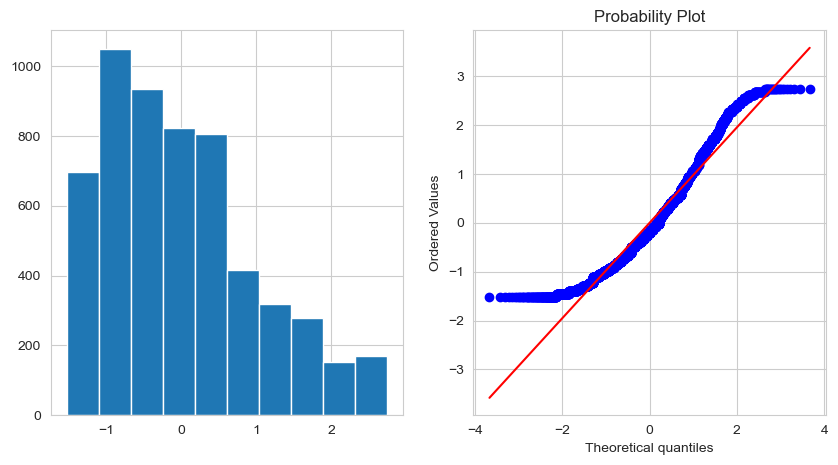

In [308]:
num_plot(x_train,"Age")

### As the number of categories in Family_Size and Work_Experience is lower than 25, we can not consider these features as numerical features and apply feature transformation techniques on them

## feature transformation techniques:
1. log 
2.root square
3.reciprocal 
4.exponential 
5. boxcox


In [309]:
x_train["Age_log"]=np.log(x_train["Age"])

C:\Users\User\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


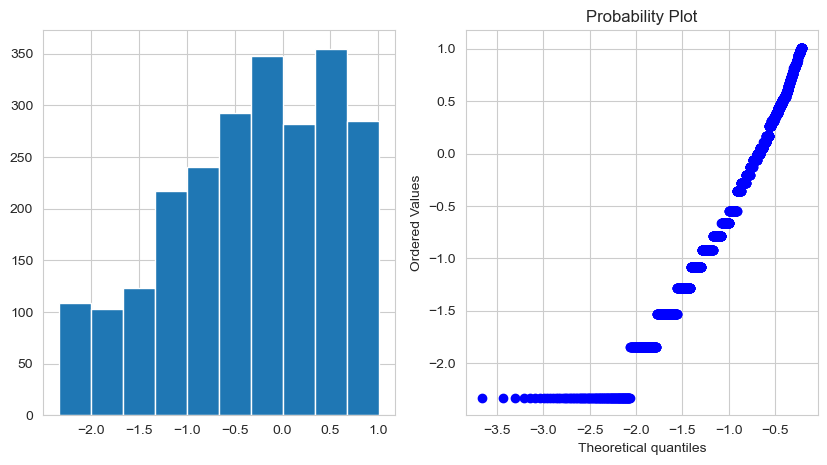

In [310]:
num_plot(x_train,"Age_log")

In [311]:
x_train["Age_root_square"]=x_train.Age**0.5

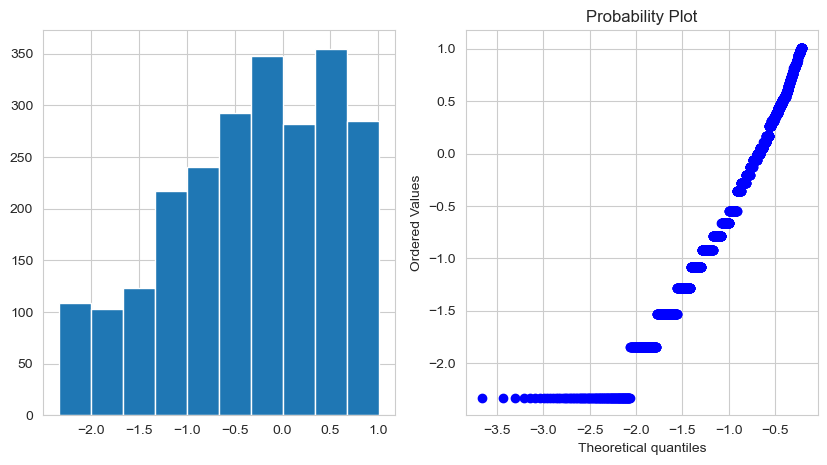

In [312]:
num_plot(x_train,"Age_log")

In [316]:
x_train["age_expo_transform"]=x_train.Age**(1/1.2)

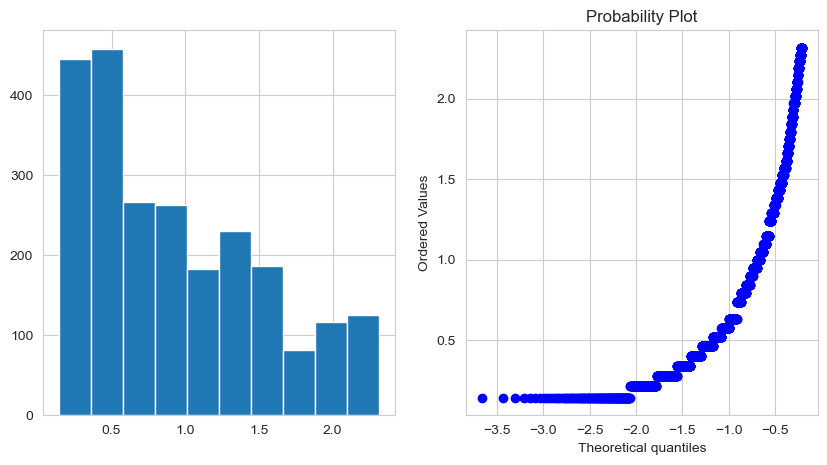

In [317]:
num_plot(x_train,"age_expo_transform")

In [320]:
x_train["age_boxcox_transform"],parameter=stat.boxcox(x_train["Age"]+2)


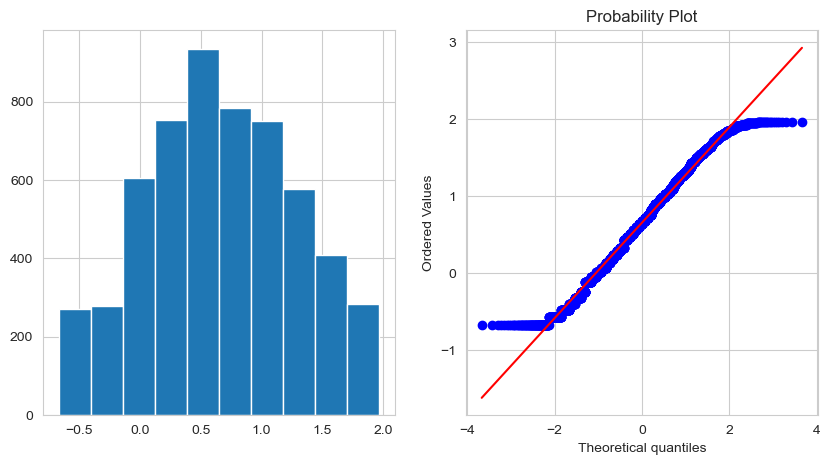

In [321]:
num_plot(x_train,"age_boxcox_transform")

## the boxcox transformation will be used as this method got the nearest result to normal distirbution

In [322]:
x_train.head()

,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Work_Experience_Nan_Importance,Artist,Healthcare,Entertainment,Engineer,Doctor,Lawyer,Executive,Marketing,Homemaker,Artist Profession,Age_log,Age_root_square,age_expo_transform,age_boxcox_transform
0,-0.136303,-0.231822,-0.343184,-0.39615,-0.106218,0.728253,-0.160607,0.908700,-1.188367,-1.463910,-1.292276,-0.774539,-0.728203,2.116145,-0.337678,-0.676789,2.242026,-0.364415,-0.307213,-0.306522,-0.281271,-0.281271,-0.195068,-0.180408,-0.096405,NaN,NaN,NaN,-0.570172
1,-0.136303,4.313657,-0.343184,-0.39615,-0.106218,-1.373149,-0.160607,-1.100473,0.841491,0.757966,0.773829,-0.481014,2.004131,0.784609,-0.337678,1.477566,-0.446025,-0.364415,-0.307213,-0.306522,-0.281271,-0.281271,-0.195068,-0.180408,-0.096405,-0.277117,0.870612,0.793794,1.180122
2,-0.136303,-0.231822,-0.343184,-0.39615,-0.106218,0.728253,-0.160607,-1.100473,-1.188367,-1.043555,0.773829,1.867189,-0.728203,-1.212695,-0.337678,1.477566,-0.446025,-0.364415,-0.307213,-0.306522,-0.281271,-0.281271,-0.195068,-0.180408,-0.096405,NaN,NaN,NaN,-0.044245
3,-0.136303,-0.231822,2.913890,-0.39615,-0.106218,-1.373149,-0.160607,0.908700,-1.188367,-0.803352,-1.292276,-0.481014,-0.728203,-1.212695,-0.337678,-0.676789,-0.446025,-0.364415,-0.307213,3.262407,-0.281271,-0.281271,-0.195068,-0.180408,-0.096405,NaN,NaN,NaN,0.184296
4,-0.136303,-0.231822,-0.343184,-0.39615,-0.106218,0.728253,-0.160607,0.908700,-1.188367,-1.043555,0.773829,0.693088,-0.728203,1.450377,-0.337678,-0.676789,2.242026,-0.364415,-0.307213,-0.306522,-0.281271,-0.281271,-0.195068,-0.180408,-0.096405,NaN,NaN,NaN,-0.044245


In [323]:
x_train.drop(["Age_log","Age_root_square","age_expo_transform"],axis=1,inplace=True)

In [325]:
x_train.drop("Age",axis=1,inplace=True)

In [326]:
x_train.head()

,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,Gender,Ever_Married,Graduated,Work_Experience,Spending_Score,Family_Size,Work_Experience_Nan_Importance,Artist,Healthcare,Entertainment,Engineer,Doctor,Lawyer,Executive,Marketing,Homemaker,Artist Profession,age_boxcox_transform
0,-0.136303,-0.231822,-0.343184,-0.39615,-0.106218,0.728253,-0.160607,0.908700,-1.188367,-1.292276,-0.774539,-0.728203,2.116145,-0.337678,-0.676789,2.242026,-0.364415,-0.307213,-0.306522,-0.281271,-0.281271,-0.195068,-0.180408,-0.096405,-0.570172
1,-0.136303,4.313657,-0.343184,-0.39615,-0.106218,-1.373149,-0.160607,-1.100473,0.841491,0.773829,-0.481014,2.004131,0.784609,-0.337678,1.477566,-0.446025,-0.364415,-0.307213,-0.306522,-0.281271,-0.281271,-0.195068,-0.180408,-0.096405,1.180122
2,-0.136303,-0.231822,-0.343184,-0.39615,-0.106218,0.728253,-0.160607,-1.100473,-1.188367,0.773829,1.867189,-0.728203,-1.212695,-0.337678,1.477566,-0.446025,-0.364415,-0.307213,-0.306522,-0.281271,-0.281271,-0.195068,-0.180408,-0.096405,-0.044245
3,-0.136303,-0.231822,2.913890,-0.39615,-0.106218,-1.373149,-0.160607,0.908700,-1.188367,-1.292276,-0.481014,-0.728203,-1.212695,-0.337678,-0.676789,-0.446025,-0.364415,-0.307213,3.262407,-0.281271,-0.281271,-0.195068,-0.180408,-0.096405,0.184296
4,-0.136303,-0.231822,-0.343184,-0.39615,-0.106218,0.728253,-0.160607,0.908700,-1.188367,0.773829,0.693088,-0.728203,1.450377,-0.337678,-0.676789,2.242026,-0.364415,-0.307213,-0.306522,-0.281271,-0.281271,-0.195068,-0.180408,-0.096405,-0.044245


In [327]:
x_test["age_boxcox_transform"],parameter=stat.boxcox(x_test["Age"]+2)


In [328]:
x_test.drop("Age",axis=1,inplace=True)

# Feature Selection methods like corelation and statistical tests are not applyed on the data as the number of feature are not huge 

# Linear Rgression 

In [329]:
from sklearn.linear_model import LinearRegression

In [332]:
from sklearn.model_selection import cross_val_score
lin_reg=LinearRegression()
mse=cross_val_score(lin_reg, x_train,y_train, scoring="neg_mean_squared_error",cv=5)
print(mse)
mean_mse=np.mean(mse)
print(mean_mse)

[-1.04275573 -1.07393994 -1.06655495 -1.0571575  -1.06430623]
-1.060942869991246


using Ridge and Lasso to avoid overfitting and creating more generalised model

In [336]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_model=Ridge()
para={
    "alpha" : [1e-15,1e-10,1e-5,1e-3,1e-2,1,5,10,20]
}
final_model=GridSearchCV(ridge_model,para,scoring="neg_mean_squared_error",cv=5)
final_model.fit(x_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.26415e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.74805e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.001, 0.01, 1, 5, 10,
                                   20]},
             scoring='neg_mean_squared_error')

In [339]:
print(final_model.best_estimator_)
print(final_model.best_score_)

Ridge(alpha=0.01)
-1.060981093248561


In [350]:
best_model=final_model.best_estimator_

In [351]:
y_hat=best_model.predict(x_test)

In [352]:
from sklearn.metrics import r2_score

In [353]:
r2_score=r2_score(y_test,y_hat)

In [354]:
print(r2_score)

0.19788529058209559


the r2score is quite low and indicating that the model is not fit. However, it must be mentioned that linear models could reach certain level of accuracy as they can only catch the linear relations and not no linear ones 

# Using ensemble techniques to reach higher accuracy

In [356]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best estimator to make predictions on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Best score: 0.5440088730727325


In [358]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [360]:
accuracy_score(y_test,y_pred)

0.5258157786038827

In [361]:
confusion_matrix(y_test,y_pred)

array([[257, 119,  74, 131],
       [144, 187, 186,  57],
       [ 64, 124, 313,  86],
       [122,  30,  11, 516]], dtype=int64)

In [362]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.44      0.44      0.44       581
           2       0.41      0.33      0.36       574
           3       0.54      0.53      0.53       587
           4       0.65      0.76      0.70       679

    accuracy                           0.53      2421
   macro avg       0.51      0.52      0.51      2421
weighted avg       0.51      0.53      0.52      2421

